In [7]:
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#处理数据
def getData(filename):
    # R由943个用户对1682个电影的10000条评分组成
    # 初始化用户x电影矩阵为0
    R = np.zeros((943, 1682))
    for line in open(filename, 'r'):
        #(用户，电影，评分，时间)
        (user, movieid, rating, ts) = line.split('\t')
        #R[int(user) - 1, int(movieid) - 1]代表第(user) - 1个用户对第int(movieid) - 1个电影的评分，这里减1是用户和电影从1号开始连续编号
        R[int(user) - 1, int(movieid) - 1] = float(rating)
    return R

In [9]:
def getLoss(R_train,R_valid, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    #Loss_valid列表保存每次迭代后的loss
    Loss_valid=[]
    #Q.T代表Q转置
    Q = Q.T
    for step in range(steps):
        #随机选一个数据进行梯度更新计算(随机梯度思想)
        i = np.random.randint(len(R_train))
        for j in range(len(R_train[i])):
            #只有R_train[i][j]评分>0时候，才计算P,Q
            if R_train[i][j] > 0:
                var0=(numpy.dot(P[i, :], Q[:, j]))
                eij = (R_train[i][j] - var0)
                for k in range(K):
                    var1=(2 * eij * Q[k][j])
                    var2=(beta * P[i][k])
                    var3=var1 - var2
                    P[i][k] =( P[i][k] + alpha * (var3))
                    Q[k][j] = (Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j]))
        #新的P*Q得到eR = (numpy.dot(P,Q))
        e = np.longfloat(0.0)
        #统计R_valid[i][j] > 0的个数
        count=0
        #只计算R_valid[i][j] > 0部分的误差和正则化部分的误差
        for i in range(len(R_valid)):
            for j in range(len(R_valid[i])):
                if R_valid[i][j] > 0:
                    count+=1
                    e = e + pow(R_valid[i][j] - numpy.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        e=e/count
        Loss_valid.append(e)
      #  print(e)
    return Loss_valid

In [10]:
def runMain():
    R_train = getData(r"C:\workspace\DeepLearningTest\data\u1.base")
    R_valid = getData(r"C:\workspace\DeepLearningTest\data\u1.test")
    R_train = numpy.array(R_train)
    R_valid = numpy.array(R_valid)
    #user_num代表评分用户的总数量，movie_num代表被评分的电影总数量
    user_num, movie_num = R_train.shape

    #利用矩阵分解的思想构造R=PXQ  即 N*M=N*K * (M*K).T = N*M 这里k参数取值2
    N = user_num
    M = movie_num
    K = 10

    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    #alpha是学习率参数
    alpha = 0.02
    #beta是正则化参数
    beta = 0.02
    #steps是迭代次数参数
    steps=1000

    loss = getLoss(R_train,R_valid, P, Q, K, steps, alpha,beta)
    #print(loss)
    plt.plot(loss, label='L_valid')
    plt.legend()
    plt.show()

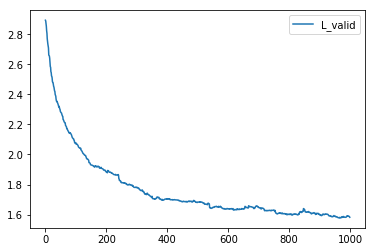

In [11]:
runMain()